### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

### Loading the dataset

In [2]:
df = pd.read_csv("D:\Data Projects\Practice Files\Student Performance Prediction\student_exam_data_new.csv")
df

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0
...,...,...,...
495,4.180170,45.494924,0
496,6.252905,95.038815,1
497,1.699612,48.209118,0
498,9.769553,97.014241,1


### Exploring the dataset

In [3]:
## investigating the dataset

df.shape

(500, 3)

In [4]:
## getting more information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [6]:
## getting more decriptive information about the dataset

from scipy.stats import describe

description = describe(df)

for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 500
minmax : (array([ 1.04555425, 40.27792138,  0.        ]), array([ 9.93668317, 99.9830604 ,  1.        ]))
mean : [ 5.48705541 68.91708366  0.368     ]
variance : [7.22639599e+00 2.93423450e+02 2.33042084e-01]
skewness : [-0.02549503  0.104173    0.54742103]
kurtosis : [-1.25488412 -1.19496097 -1.70033021]


### Cleaning the dataset

In [7]:
## checking for any null values

df.isnull().sum()

Study Hours            0
Previous Exam Score    0
Pass/Fail              0
dtype: int64

In [8]:
## checking for any duplicates

df.duplicated().sum()

0

In [9]:
## checking for any outliers

q1 = df["Study Hours"].quantile(0.25) ## calculating the lower quartile
q3 = df["Study Hours"].quantile(0.75) ## calculating the upper quartile

iqr = q3 - q1

print("Lower Quartile: ", q1)
print("Upper Quartile: ", q3)
print("Inter-Quartile Range: ", iqr)

Lower Quartile:  3.171517217578737
Upper Quartile:  7.805123933710409
Inter-Quartile Range:  4.633606716131672


In [10]:
# getting the upper and lower limit

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

### Analyzing and visualizing the dataset

#### Visualizing the correlations between variables

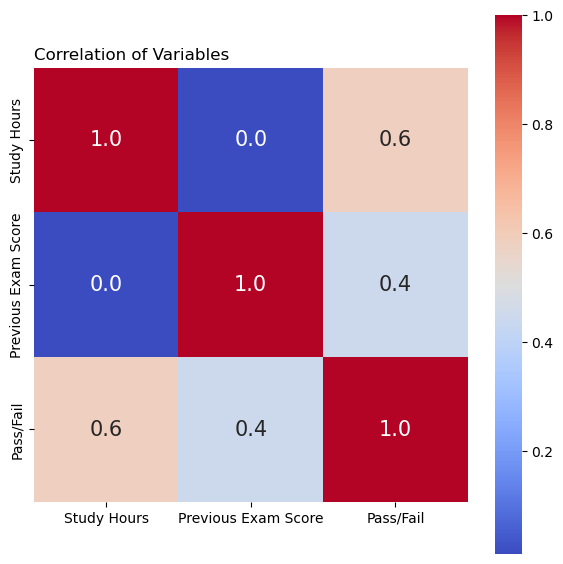

In [13]:
correlation = df.corr()

plt.figure(figsize = (7,7))
sns.heatmap(correlation, annot=True, annot_kws={"size" : 15}, cbar=True, square=True, fmt = ".1f", cmap="coolwarm")
plt.title("Correlation of Variables", loc = "left")
plt.show()

#### Relationship between Study Hours and Previous Exam Score

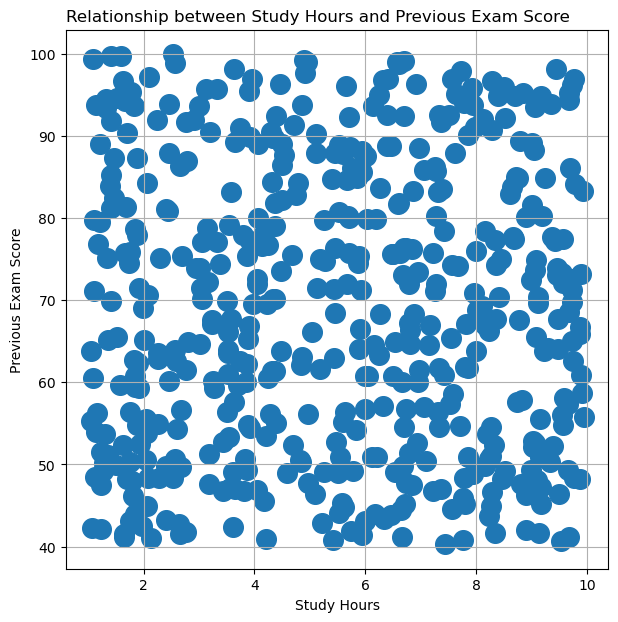

In [15]:
plt.figure(figsize = (7,7))
plt.scatter(df["Study Hours"], df["Previous Exam Score"], s = 200)
plt.xlabel("Study Hours")
plt.ylabel("Previous Exam Score")
plt.grid(True)
plt.title("Relationship between Study Hours and Previous Exam Score", loc = "left")
plt.show()

#### The Study hours have no relationship with the previous exam score

### Building the Student Performance Prediction Model

#### Scale:
    0 means The student failed
    1 means the student passed

#### Definining the dependent and independent variables

In [16]:
X = df.drop(columns = ["Pass/Fail"]) ## independent variables
y = df["Pass/Fail"] ## dependent varibles

#### Loading the required functions

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Training the model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#### Designing the model

In [20]:
log_reg = LogisticRegression()

In [24]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
model = log_reg.predict(X_test)
model

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

#### Testing the accuracy score of the model

In [32]:
accuracy_score(y_test, model)

0.856

##### Conclusion:
    The model is a good predictor of the student performance with an accuracy 0f 85%.